importing libraries:

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


load dataset and it's information:

In [28]:
df = pd.read_csv("Advertising.csv")
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


understand the dataset:

<Axes: >

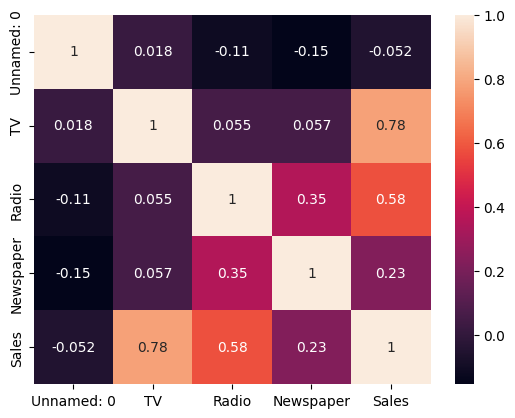

In [29]:
sns.scatterplot(x='TV', y='Sales', data=df)
sns.heatmap(df.corr(), annot=True)


prepare feaures and target:

In [30]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


split dataset into training and testing:

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train Linear Regression model :

In [32]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

test Linear Regression model:

In [33]:
y_pred = model.predict(X_test)


check the accuracy (r2 score, mean absolute error)

In [34]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))


0.899438024100912
1.4607567168117603


graphing for Linear Regression   :

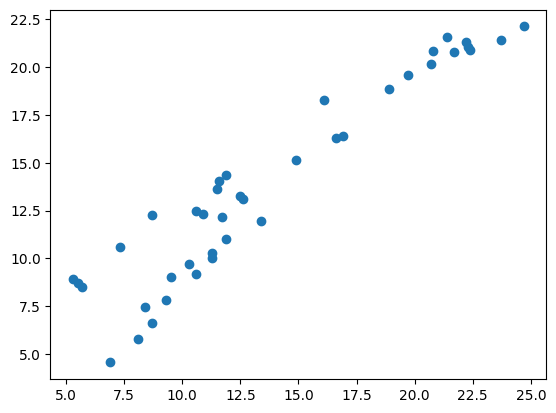

In [35]:
plt.scatter(y_test, y_pred)


training Random Forest Regressor model:

In [36]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


evaluate Random Forest Regressor model:

In [37]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Evaluation")
print("MAE  :", mae_rf)
print("RMSE :", rmse_rf)
print("R² Score :", r2_rf)


Random Forest Evaluation
MAE  : 0.6287125000000021
RMSE : 0.7572349907723515
R² Score : 0.9818333477552758


graphing with comparison for Random Forest Regressor model:

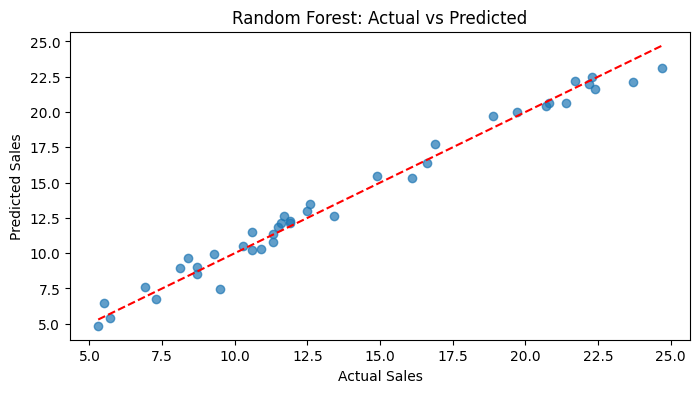

In [38]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

training Gradient Boosting Regressor model:

In [48]:
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


evaluate Gradient Boosting Regressor model:

In [49]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting Evaluation")
print("MAE  :", mae_gb)
print("RMSE :", rmse_gb)
print("R² Score :", r2_gb)



Gradient Boosting Evaluation
MAE  : 0.618742412127568
RMSE : 0.7297819762218902
R² Score : 0.9831267080346855


graphing with comparison for Gradient Boosting Regressor model:

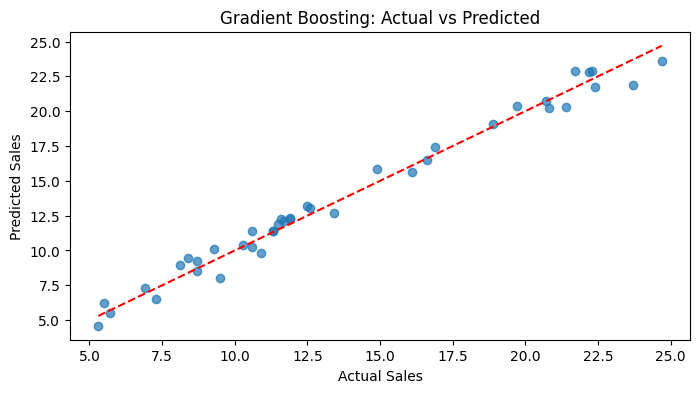

In [50]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.show()

convert data into time series:

In [42]:
df['Date'] = pd.date_range(start='2020-01-01', periods=len(df), freq='D')
df = df.set_index('Date')


using ARIMA model:

In [43]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df['Sales'], order=(2,1,2))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=10)
print(arima_forecast)


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2020-07-19    13.139686
2020-07-20    14.367998
2020-07-21    13.955833
2020-07-22    14.016612
2020-07-23    14.023347
2020-07-24    14.016861
2020-07-25    14.018673
2020-07-26    14.018479
2020-07-27    14.018424
2020-07-28    14.018457
Freq: D, Name: predicted_mean, dtype: float64


using Prophet model:

In [44]:
from prophet import Prophet

df_prophet = df.reset_index()[['Date','Sales']]
df_prophet.columns = ['ds','y']

prophet_model = Prophet()
prophet_model.fit(df_prophet)

future = prophet_model.make_future_dataframe(periods=10)
forecast = prophet_model.predict(future)

forecast[['ds','yhat']].tail(10)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat
200,2020-07-19,12.689197
201,2020-07-20,13.587799
202,2020-07-21,13.875486
203,2020-07-22,14.347560
204,2020-07-23,12.956474
205,2020-07-24,13.289588
206,2020-07-25,12.698537
207,2020-07-26,12.644450
208,2020-07-27,13.543052
209,2020-07-28,13.830740


graphing time series forecast for ARIMA model:

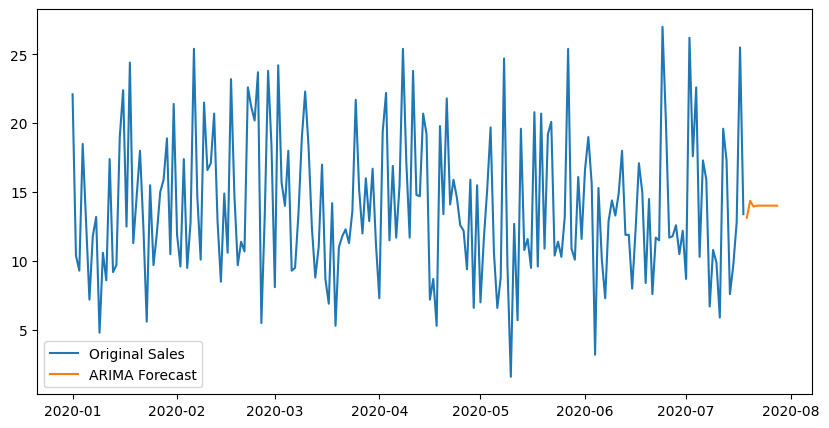

In [45]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Original Sales')
plt.plot(arima_forecast, label='ARIMA Forecast')
plt.legend()
plt.show()


graphing time series forecast for Prophet model:

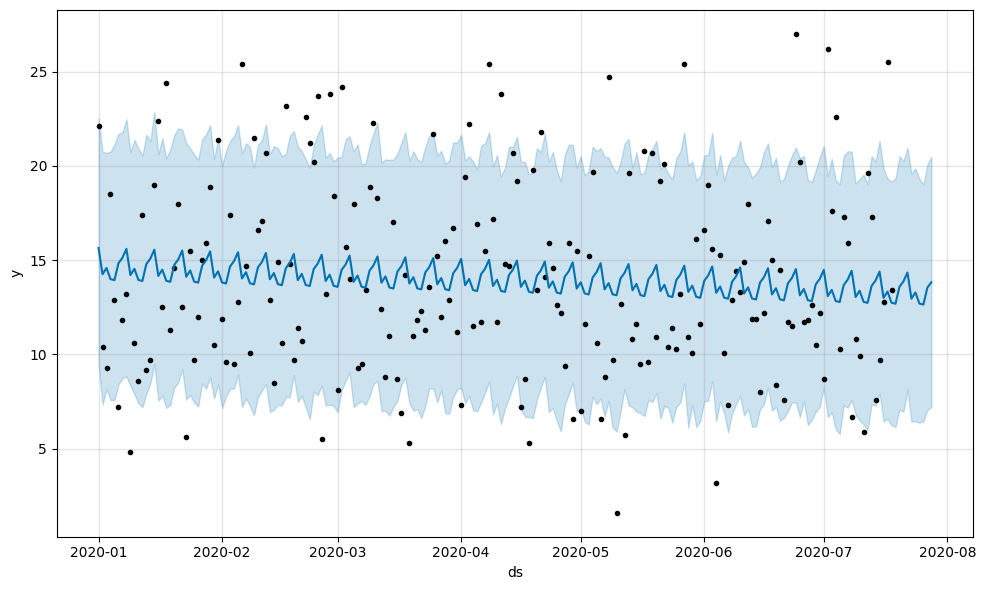

In [46]:
prophet_model.plot(forecast)
plt.show()
